# A/B Test Evaluation on Product Conversion Funnel

Dataset: [UCI Online Retail](https://archive.ics.uci.edu/ml/datasets/online+retail)

## Objective:
Simulate an A/B test on a product funnel using the Online Retail Dataset to evaluate if a change (like free shipping, new layout, or discount strategy) improves conversion rate.

### Step 1: Load Data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from statsmodels.stats.proportion import proportions_ztest

In [6]:
df = pd.read_excel("Online Retail.xlsx")

In [10]:
df.shape

(541909, 8)

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Step 2: Clean & Prepare Data

**Goal**: Filter relevant data to simulate A/B testing.

**2.1 Drop missing CustomerIDs and negative quantities (returns)**

In [13]:
df[df['CustomerID'].notnull()].shape

(406829, 8)

In [14]:
df = df[df['CustomerID'].notnull()]

In [17]:
df[df['Quantity'] < 0].shape

(8905, 8)

In [18]:
df = df[df['Quantity'] > 0]

In [19]:
df.shape

(397924, 8)

**2.2 Create a new column to simulate an A/B test group (random assignment)**

In [21]:
np.random.seed(42)
df['test_group'] = np.where(np.random.rand(len(df)) < 0.5, 'A', 'B')

**2.3 Simulate a "conversion"**

We'll define conversion as a customer making a purchase above £50.

In [22]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['converted'] = df['TotalPrice'] > 50

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,test_group,TotalPrice,converted
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,A,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,B,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,B,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,B,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,A,20.34,False


### Step 3: Analyze A/B Test Results

**Goal**: Evaluate whether Group B (simulating the new product variant) performs significantly better than Group A (control) in terms of conversions.

**3.1 Calculate Conversion Rate by Group**

In [30]:
# Group by test group and calculate conversion rate

conversion_summary = df.groupby('test_group')['converted'].agg(['count', 'sum'])
conversion_summary['conversion_rate'] = conversion_summary['sum'] / conversion_summary['count']
conversion_summary

,count,sum,conversion_rate
test_group,,,
A,198800,13514,0.067978
B,199124,13414,0.067365


**3.2 Visualize the Results**

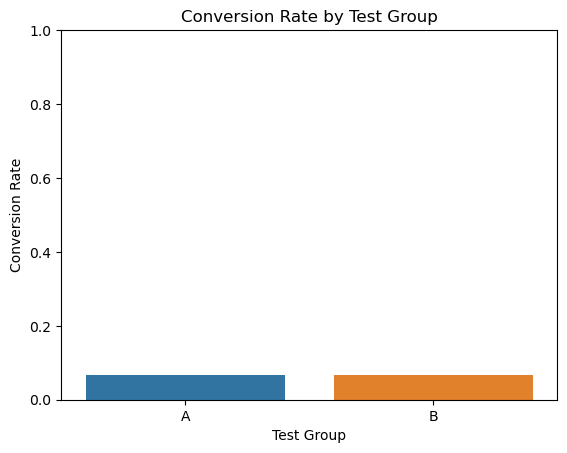

In [27]:
sns.barplot(x=conversion_summary.index, y=conversion_summary['conversion_rate'])
plt.title("Conversion Rate by Test Group")
plt.ylabel("Conversion Rate")
plt.xlabel("Test Group")
plt.ylim(0, 1)
plt.show()

**3.3 Perform Statistical Significance Test**

We'll use a two-proportion z-test to check if the difference is statistically significant.

- If p-value < 0.05: The difference in conversion rates is statistically significant.
- If p-value >= 0.05: The result could be due to chance.

In [29]:
# Extract values
conversions = conversion_summary['sum'].values
totals = conversion_summary['count'].values

# Run z-test
z_stat, p_val = proportions_ztest(conversions, totals)
print(f"Z-statistic: {z_stat:.2f}, P-value: {p_val:.4f}")

Z-statistic: 0.77, P-value: 0.4416


The difference in conversion rates between Group A and Group B is **not statistically significant**.